# Import Lib

In [19]:
import pandas as pd
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [20]:
# --- Block 1: Load the processed DataFrame ---
processed_data_path = "data/processed/combined_data.csv"

try:
    combined_df = pd.read_csv(processed_data_path, index_col = "Date", parse_dates = True)
    print("Combined DataFrame loaded successfully")
except FileNotFoundError:
    print(f"Error: File {processed_data_path} not found. Run preprocessing notebook.")


Error: File data/processed/combined_data.csv not found. Run preprocessing notebook.


# Separation of features (X) and target variable (y)

In [21]:
X = combined_df.drop("target", axis = 1)
y = combined_df["target"]

print("\nFeatures (X) and target variable (y) separated.")
print(f"Feature columns (X): {X.columns.tolist()}")


Features (X) and target variable (y) separated.
Feature columns (X): ['Close', 'Volume', 'Daily_Return', 'SMA_5', 'SMA_10', 'SMA_20', 'RSI', 'MACD']


# Chronological division of data 

In [22]:
# 80% of the oldest data for training and 20% of the newest data for testing.

train_size = int(0.80 * len(combined_df))

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print(f"\nData chronological split complete.")
print(f"Training set size: {len(X_train)} ({len(X_train)/len(combined_df):.2%})")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(combined_df):.2%})")
print(f"Training start date: {X_train.index.min()} | Training end date: {X_train.index.max()}")
print(f"Test start date: {X_test.index.min()} | Test end date: {X_test.index.max()}")


Data chronological split complete.
Training set size: 3939 (80.00%)
Test set size: 985 (20.00%)
Training start date: 2015-02-06 00:00:00 | Training end date: 2024-12-30 00:00:00
Test start date: 2021-01-19 00:00:00 | Test end date: 2024-12-30 00:00:00


# Model instantiation and training

In [23]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

print("\nStarting model training...")
model.fit(X_train, y_train)
print("Model training completed successfully!")


Starting model training...
Model training completed successfully!


# Model Evaluation

Accuracy:  0.4711
Precision:  0.4618
Recall:  0.6695
F1-Score:  0.5466

Confusion Matrix:
[[150 366]
 [155 314]]


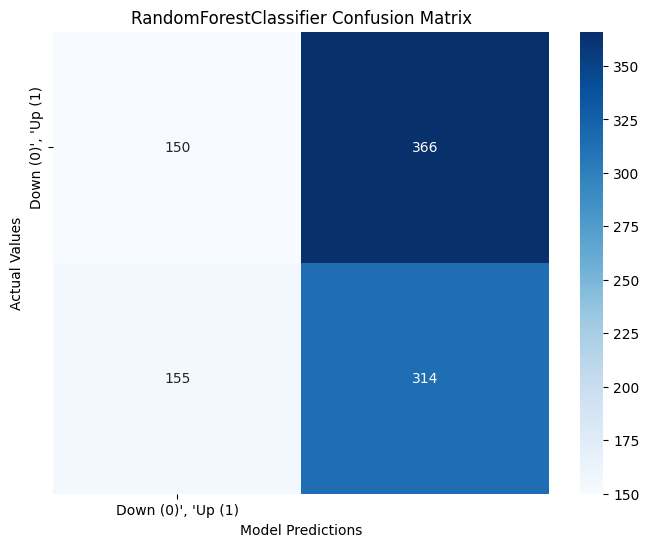

In [24]:
# Prediction and Evaluation Metrics
y_pred = model.predict(X_test)

# Calculate Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy: .4f}")
print(f"Precision: {precision: .4f}")
print(f"Recall: {recall: .4f}")
print(f"F1-Score: {f1: .4f}")

# Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix for Better Understanding
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues",
           xticklabels = ["Down (0)', 'Up (1)"],
           yticklabels = ["Down (0)', 'Up (1)"])

plt.xlabel('Model Predictions')
plt.ylabel('Actual Values')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

# Exporting the Test DataFrame

In [25]:
# Preparing and Exporting the DataFrame to Power BI

# Creating a DataFrame with the test results
results_df = X_test.copy()
results_df['Actual_Target'] = y_test
results_df["Predicted_Target"] = y_pred

# Displaying the first few rows for verification
print("\nTest Results DataFrame:")
print(results_df.head())

# Creating the 'data/results' folder if it doesn't exist
results_path = "../data/results"
os.makedirs(results_path, exist_ok = True)

# Exporting the DataFrame to a CSV file
results_file_path = os.path.join(results_path, "model_predictions.csv")
results_df.to_csv(results_file_path, index = True)

print(f"\nResults DataFrame exported to: {results_file_path}")


Test Results DataFrame:
                Close      Volume  Daily_Return      SMA_5     SMA_10  \
Date                                                                    
2021-01-19  59.215462  27155400.0     -0.002651  59.925591  61.537238   
2021-01-20  58.120041  20480000.0     -0.018499  59.434541  61.302416   
2021-01-21  58.774773  25983400.0      0.011265  58.875501  60.738340   
2021-01-22  58.655174  25814300.0     -0.002035  58.827657  60.182449   
2021-01-26  57.761208  24921600.0     -0.015241  58.505331  59.538420   

               SMA_20        RSI      MACD  Actual_Target  Predicted_Target  
Date                                                                         
2021-01-19  58.545934  58.449062  2.611669              0                 0  
2021-01-20  58.707098  54.024329  2.286712              1                 1  
2021-01-21  58.882113  56.160529  2.058286              0                 0  
2021-01-22  59.080736  55.651854  1.846323              0                

# Saving the Model for Production

In [27]:
# Set the path and name of the .pkl file
model_output_path = "../model/"
model_filename = "alpha_predictor_model.pkl"

# Create the 'model' folder if it doesn't exist
os.makedirs(model_output_path, exist_ok = True)

# Save the model to the .pkl file
joblib.dump(model, os.path.join(model_output_path, model_filename))

print(f"\nTrained model successfully saved to: {os.path.join(model_output_path, model_filename)}")


Trained model successfully saved to: ../model/alpha_predictor_model.pkl
